9. Informações gerais do data set

Leia o dataset anexado nesta aula e armazene em uma variável;

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('dataset.csv')
df

,Nome,Idade,Rating,Renda
0,Sato,18,3.66,D
1,Suzuki,20,3.51,D
2,Takahashi,26,9.73,A
3,Tanaka,25,2.47,D
4,Watanabe,26,8.07,A
...,...,...,...,...
95,Matsuo,21,6.42,B
96,Kikuchi,18,7.91,A
97,Nomura,28,2.86,D
98,Arai,28,8.98,A


Mostre as 3 primeiras linhas do dataset;

In [4]:
df.head(3)

,Nome,Idade,Rating,Renda
0,Sato,18,3.66,D
1,Suzuki,20,3.51,D
2,Takahashi,26,9.73,A


Mostre as duas últimas linhas do dataset;

In [5]:
df.tail(2)

,Nome,Idade,Rating,Renda
98,Arai,28,8.98,A
99,Watanabe,29,4.81,B


Mostre o shape do dataset;

In [7]:
df.shape

(100, 4)

Obtenha informações das colunas com o método info();

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nome    100 non-null    object 
 1   Idade   100 non-null    int64  
 2   Rating  100 non-null    float64
 3   Renda   100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


Mostre estatísticas descritivas do dataset;

In [10]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Idade,100.0,23.40,4.04,17.00,20.00,24.00,27.25,29.00
Rating,100.0,5.63,2.60,1.15,3.49,5.89,7.84,9.99


Mostre o tipo de dado de cada coluna;

In [11]:
df.dtypes

Nome       object
Idade       int64
Rating    float64
Renda      object
dtype: object

Mostre a existência ou não de missing data.

In [12]:
print('Missing values')
df.isna().sum()

Nome      0
Idade     0
Rating    0
Renda     0
dtype: int64

10. Estatísticas descritivas

Obtenha estatísticas descritivas da idade dos clientes (média, variância, desvio padrão, moda, mediana);

In [21]:
print('Estatística descritiva - Variável Idade'.center(100, ' '))
print(f"\tMédia: {df['Idade'].mean().round(2)}")
print(f"\tVariância: {df['Idade'].var().round(2)}")
print(f"\tDesvio padrão: {df['Idade'].std().round(2)}")
print(f"\tModa: {df['Idade'].mode()[0]}")
print(f"\tMediana: {df['Idade'].median().round(2)}")

                              Estatística descritiva - Variável Idade                               
	Média: 23.4
	Variância: 16.34
	Desvio padrão: 4.04
	Moda: 28
	Mediana: 24.0


Qual a correlação entre a idade e o rating?

In [22]:
print('Correlação entre Idade e rating')
df['Idade'].corr(df['Rating'])

Correlação entre Idade e rating


-0.009929703930181348

Qual a covariância entre a idade e o rating?

In [23]:
print('Covariância entre Idade e rating')
df['Idade'].cov(df['Rating'])

Covariância entre Idade e rating


-0.10442424242424238

Mostre as classes de renda do dataset.

In [24]:
print('Perfil de Renda')
df['Renda'].value_counts()

Perfil de Renda


A    36
B    31
D    22
E    11
Name: Renda, dtype: int64

11. Relações entre as variáveis e visualização

Calcule a matriz de correlação e covariância;

In [27]:
print('Correlação')
df.corr()

Correlação


C:\Users\natha\AppData\Local\Temp\ipykernel_1008\1874308548.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Idade,Rating
Idade,1.00000,-0.00993
Rating,-0.00993,1.00000


In [28]:
print('Covariância')
df.cov()

Covariância


C:\Users\natha\AppData\Local\Temp\ipykernel_1008\1887499122.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Idade,Rating
Idade,16.343434,-0.104424
Rating,-0.104424,6.766853


Crie uma nova coluna para a Renda, em escala numérica;


a escala varia entre 1 e 4 (E:1,D:2,B:3,A:4), quanto maior o número, maior o nível de renda do cliente;

In [29]:
def escala_num(rating):
    if rating == 'E':
        return 1
    if rating == 'D':
        return 2
    if rating == 'B':
        return 3
    if rating == 'A':
        return 4

In [30]:
df['RendaNum'] = df['Renda'].apply(escala_num)

In [31]:
print('Correlação entre Rating e Renda')
df['Rating'].corr(df['RendaNum'])

Correlação entre Rating e Renda


0.9521213336056304

12. Visualizando a distribuição dos dados

Gere um histograma para a coluna idade;

Text(0.5, 1.0, 'Histograma da coluna idade')

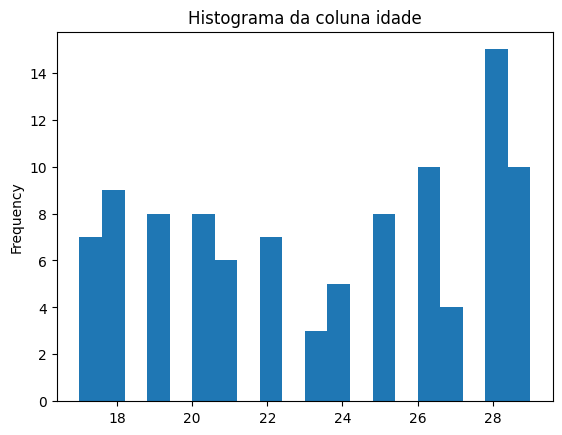

In [34]:
df['Idade'].plot(kind = 'hist', bins = 20)
plt.title('Histograma da coluna idade')

Gere um boxplot para as colunas Idade e Rating.

<AxesSubplot: >

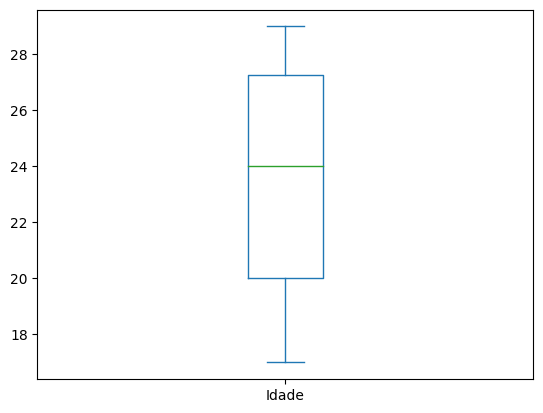

In [35]:
df['Idade'].plot(kind= 'box')

13. Consultas¶
Filtre os clientes com idade maior ou igual a 28 anos;

In [36]:
df[df['Idade'] >= 28]

,Nome,Idade,Rating,Renda,RendaNum
17,Kimura,28,1.29,E,1
19,Shimizu,28,6.15,B,3
24,Hashimoto,29,4.57,B,3
29,Ogawa,28,6.07,B,3
32,Goto,28,8.30,A,4
35,Murakami,29,7.43,A,4
47,Matsuda,28,9.77,A,4
49,Nakano,29,8.97,A,4
51,Ono,29,1.50,E,1
53,Takeuchi,28,7.45,A,4


Filtre os clientes com renda A;

In [37]:
df[df['Renda'] == 'A']

,Nome,Idade,Rating,Renda,RendaNum
2,Takahashi,26,9.73,A,4
4,Watanabe,26,8.07,A,4
5,Ito,25,7.25,A,4
9,Saito,21,8.63,A,4
10,Kato,18,9.34,A,4
11,Yoshida,24,7.83,A,4
12,Yamada,20,9.14,A,4
13,Sasaki,24,7.45,A,4
14,Yamaguchi,18,7.35,A,4
22,Ikeda,19,8.30,A,4


Filtre os clientes com rating maior que 5.

In [38]:
df[df['Rating'] > 5]

,Nome,Idade,Rating,Renda,RendaNum
2,Takahashi,26,9.73,A,4
4,Watanabe,26,8.07,A,4
5,Ito,25,7.25,A,4
6,Yamamoto,19,6.53,B,3
7,Nakamura,21,6.34,B,3
9,Saito,21,8.63,A,4
10,Kato,18,9.34,A,4
11,Yoshida,24,7.83,A,4
12,Yamada,20,9.14,A,4
13,Sasaki,24,7.45,A,4
